In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d # Package for 3D plotting

In [8]:
class robot_arm():
    l1 = 1 
    l2 = 0.7
    l3 = 0.6
    
    obs1 = [1, 0.6, 1.2] # Center of spehrical obstacle
    ro = 0.4 # Radius of spherical obstacle

    lim_min = np.array([-np.pi, 0, -np.pi]) # Joints min angles
    lim_max = np.array([np.pi, np.pi, np.pi]) # Joints max angles

    # ---------------------------------------------------------------------------------------------------------
    def __init__(self):
        pass

    # ---------------------------------------------------------------------------------------------------------
    # Direct kinematics function - receives the angles of the robot and returns the position of the end-effector
    def direct_kinematics(self, q):
        x = np.cos(q[0]) * (self.l2 * np.cos(q[1]) + self.l3 * np.cos(q[1] + q[2]))
        y = np.sin(q[0]) * (self.l2 * np.cos(q[1]) + self.l3 * np.cos(q[1] + q[2]))
        z = self.l1 + (self.l2 * np.sin(q[1]) + self.l3 * np.sin(q[1] + q[2]))
        
        return np.array([x, y, z]) # Position of end-effector

    # ---------------------------------------------------------------------------------------------------------
    # Checks if the end-effector is in collision with the obstacle, returns: True - in collision, False - no collision
    def collision_checker(self, q):
        x = self.direct_kinematics(q)

        # Check if collision with obstacle
        if np.linalg.norm(x - self.obs1) < self.ro:
            return True
        
        # Check if angles in limit
        if np.any(q < self.lim_min) or np.any(q > self.lim_max):
            return True
        
        return False # No collsion

    # ---------------------------------------------------------------------------------------------------------
    # Generate a random robot configuration (joint angles) within the limits
    def gen_rand_conf(self):
        return np.random.random((3,)) * (self.lim_max - self.lim_min).reshape((3,)) + self.lim_min.reshape((3,))

    # ---------------------------------------------------------------------------------------------------------
    # Plot the robot in 3D
    def plot(self, q):

        # Each row in this matrix is the position of a joint of the robot
        X = np.array([[0, 0, 0], 
            [0, 0, self.l1], 
            [self.l2 * np.cos(q[0]) * np.cos(q[1]), self.l2 * np.sin(q[0]) * np.cos(q[1]), self.l1 + self.l2 * np.sin(q[1])],
            [np.cos(q[0]) * (self.l2 * np.cos(q[1]) + self.l3 * np.cos(q[1] + q[2])), np.sin(q[0]) * (self.l2 * np.cos(q[1]) + self.l3 * np.cos(q[1] + q[2])), self.l1 + (self.l2 * np.sin(q[1]) + self.l3 * np.sin(q[1] + q[2]))]])

        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.plot3D(X[:,0], X[:,1], X[:,2], '-ok', markersize = 10)

        x = self.direct_kinematics(q)
        ax.scatter3D(x[0], x[1], x[2], color = 'red') # Plot end-effector - red marker
        ax.scatter3D(0, 0, 0, color = 'green') # Plot base of robot - green marker

        # This is just to set the range of the axes
        max_range = np.array([X[:,0].max()-X[:,0].min(), X[:,1].max()-X[:,1].min(), X[:,2].max()-X[:,2].min()]).max() / 2.0
        mid_x = (X[:,0].max()+X[:,0].min()) * 0.5
        mid_y = (X[:,1].max()+X[:,1].min()) * 0.5
        mid_z = (X[:,2].max()+X[:,2].min()) * 0.5
        ax.set_xlim(mid_x - max_range, mid_x + max_range)
        ax.set_ylim(mid_y - max_range, mid_y + max_range)
        ax.set_zlim(mid_z - max_range, mid_z + max_range)

        # draw spherical obstacle
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        xs = self.obs1[0] + self.ro * np.outer(np.cos(u), np.sin(v))
        ys = self.obs1[1] + self.ro * np.outer(np.sin(u), np.sin(v))
        zs = self.obs1[2] + self.ro * np.outer(np.ones(np.size(u)), np.cos(v))
        ax.plot_surface(xs, ys, zs, color='b')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        plt.show()

=================================================================================================================

In [9]:
G = robot_arm() # Generate robot

In [10]:
q = [-0.5,0.2,0.2] # Some robot configuration not in collision
# q = [0.3,0.2,0.2] # Some robot configuration in collision
# q = G.gen_rand_conf() # Pick random configuration

In [11]:
# Check if configuration q is in collision
if G.collision_checker(q):
    print("Warning: End-effector in collision!!!")
else:
    print("No collision.")

No collision.


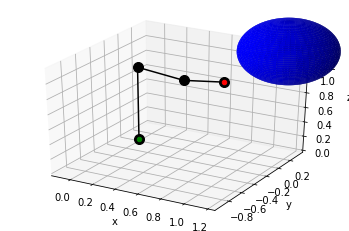

In [12]:
G.plot(q) # Plot robot in configuration q